### Step 1: Identify economic factors and collect data. 

According to Article 2 of RTS on specification of the nature severity and duration of an economic downturn, the following econmic factors should be considered for retail exposures (except retail SME, residential/commercial real estate exposures):

1. GDP
2. Unemployment rate
3. Aggregate default rates, where available
4. Aggregate credit losses, where available
5. Total household debt, where availalbe
6. Disposable income, where available

Collect GDP and unemployment rate for a period of 20 years. GDP is available at quarterly frequency, unemployment rate in Vietnam, however, is only available at Annual frequency.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


def plotting_single(df, feature, feature_label, x_label, title):
    fig, ax2 = plt.subplots(figsize=(20, 10))
    date_form = mdates.DateFormatter("%Y-%m")
    ax2.plot(pd.to_datetime(df.Date), df[feature], color='b', label=feature_label)
    ax2.set_ylabel(feature_label, color='b')
    ax2.set_xlabel(x_label)
    ax2.tick_params(axis='y', labelcolor='b')
    
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))
    plt.gca().xaxis.set_major_formatter(date_form)

    plt.title(title)
    plt.show()

GDP = pd.read_excel(r'Vietnam_GDP_YoY_change.xlsx').sort_values(by='Date').reset_index(drop=True)
GDP['Date'] = GDP['Date'].dt.strftime('%Y-%m')
GDP = GDP[GDP['Date'] >= '2002']


UNR = pd.read_excel(r'Vietnam_UNR.xlsx').sort_values(by='Date').reset_index(drop=True)
UNR['Date'] = UNR['Date'].dt.strftime('%Y-%m')
UNR = UNR[UNR['Date'] >= '2002']



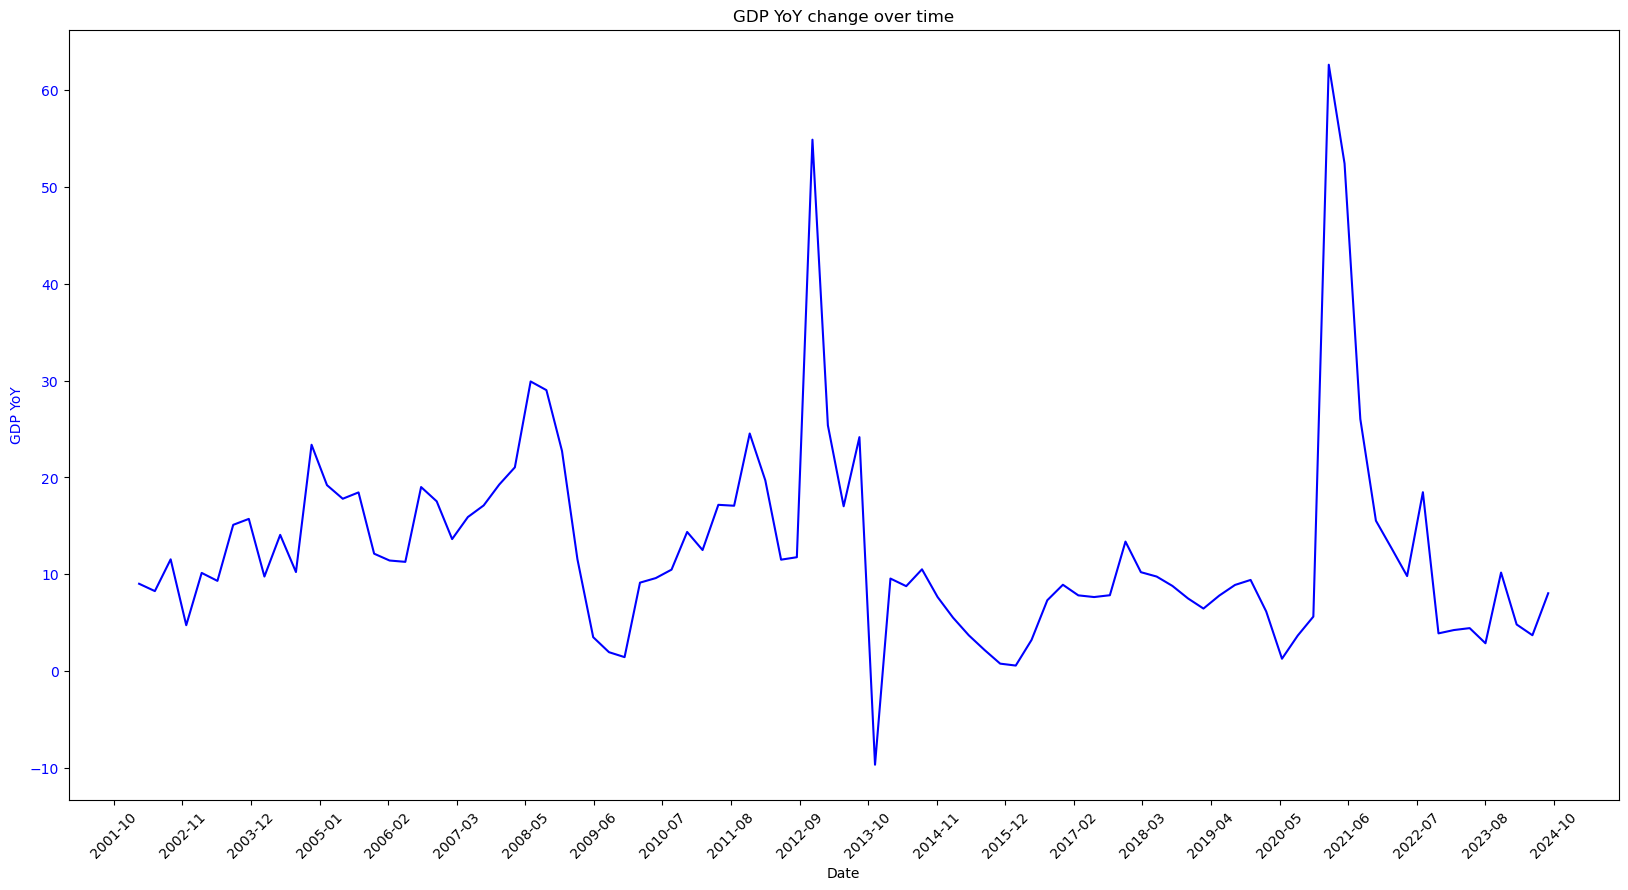

In [2]:
plotting_single(GDP, 'GDP YoY', 'GDP YoY', 'Date', 'GDP YoY change over time')

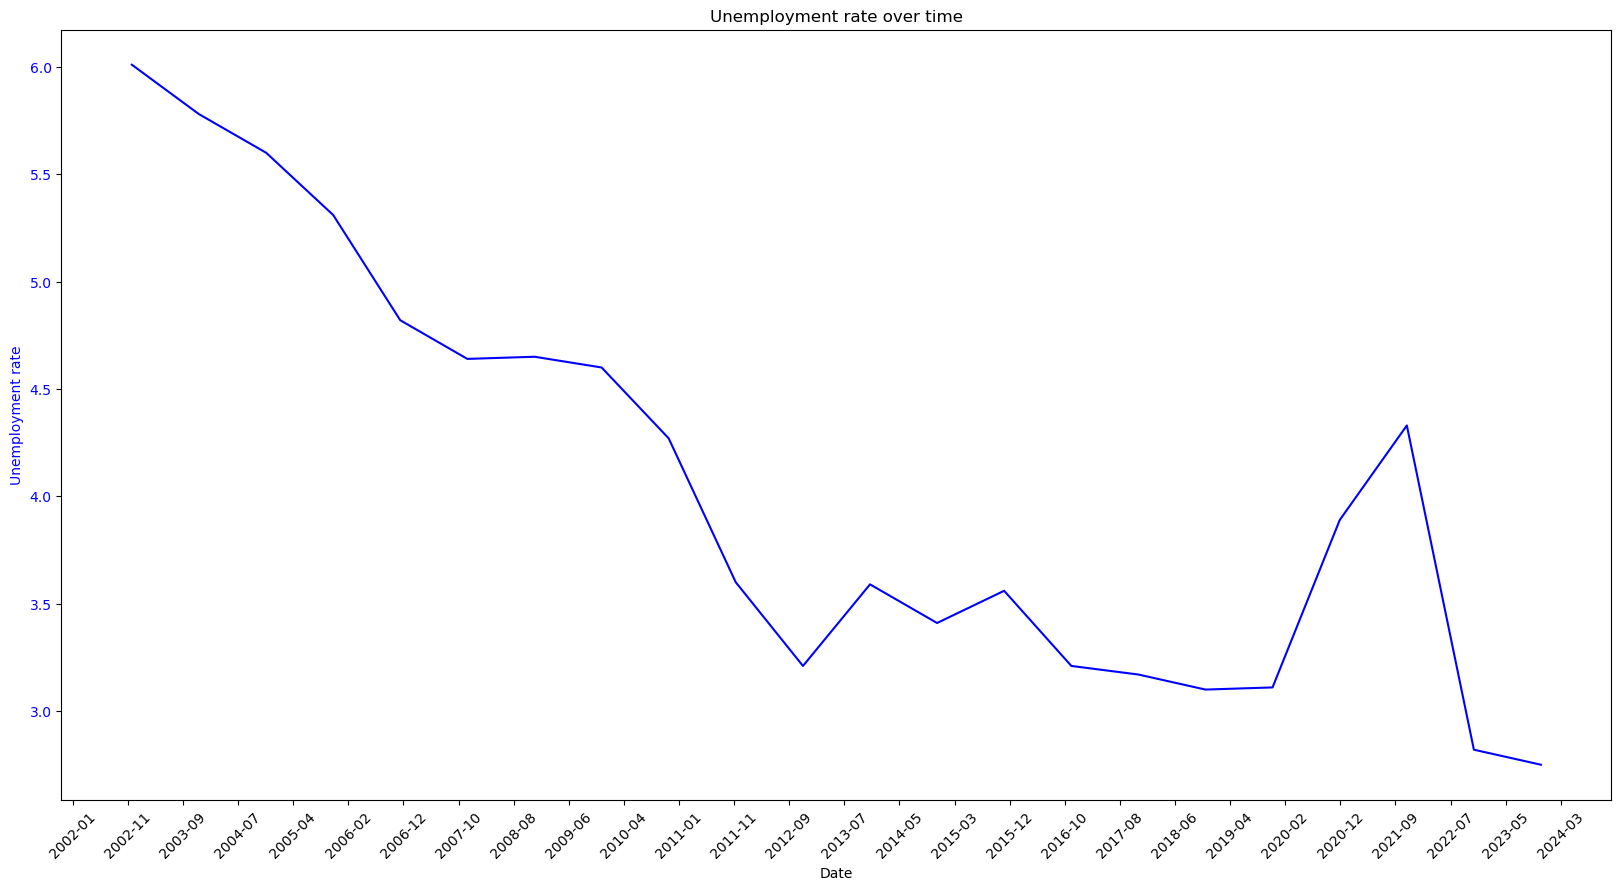

In [3]:
plotting_single(UNR, 'Unemployment rate', 'Unemployment rate', 'Date', 'Unemployment rate over time')

### Step 2: Identify severity of an economic downturn for each of the economic factors

Severity corresponds to the worst 12 month average value for the economic factor realisations under consideration. The 12-month period can start at any point in time within the identification period, if the historical data for the considered economic factor is available more frequently than annually.

In [4]:
# For GDP, we compute the rolling mean to detect a 12-period with the lowest GDP

GDP['4 quarter Rolling mean'] = GDP['GDP YoY'].rolling(window=4).mean()
GDP[GDP['4 quarter Rolling mean'] == GDP['4 quarter Rolling mean'].min()]

,Date,GDP YoY,4 quarter Rolling mean
58,2016-06,3.203874,1.671314


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(GDP)

       Date    GDP YoY  4 quarter Rolling mean
1   2002-03   9.011625                     NaN
2   2002-06   8.252895                     NaN
3   2002-09  11.535740                     NaN
4   2002-12   4.728758                8.382255
5   2003-03  10.131797                8.662298
6   2003-06   9.309226                8.926380
7   2003-09  15.100203                9.817496
8   2003-12  15.714395               12.563905
9   2004-03   9.758297               12.470530
10  2004-06  14.064113               13.659252
11  2004-09  10.222555               12.439840
12  2004-12  23.375328               14.355073
13  2005-03  19.201580               16.715894
14  2005-06  17.796341               17.648951
15  2005-09  18.451068               19.706080
16  2005-12  12.119177               16.892042
17  2006-03  11.413380               14.944992
18  2006-06  11.275320               13.314736
19  2006-09  19.004631               13.453127
20  2006-12  17.529912               14.805811
21  2007-03  

In [6]:
# Unemployment rate data for Vietnam is only available at annual periodicity, 
# so the year with the highest value of unemployment rate will be identified as the dowturn period for this economic factor
UNR[UNR['Unemployment rate'] == UNR['Unemployment rate'].max()]

,Date,Unemployment rate
6,2002-12,6.01


In [7]:
UNR

,Date,Unemployment rate
6,2002-12,6.01
7,2003-12,5.78
8,2004-12,5.60
9,2005-12,5.31
10,2006-12,4.82
11,2007-12,4.64
12,2008-12,4.65
13,2009-12,4.60
14,2010-12,4.27
15,2011-12,3.60


### Step 3: Identify downturn periods and their duration 

Generally, the minimum requirement for a downturn period duration is 12 months. Deviation from 12 months options should only happen when:
 - an economic factor remains on severe values.
 - the economic factors show the effects with different lags in time. 
 - an adjacent peak or trough relates to the same economic condition


Summing up, if using the standard duration of 12 months, we can identify the following downturn periods:

1. For the economic factor Unemployment rate: 01-2002 to 12-2002
2. For the econmic factor GDP growth rate: 07-2015 to 06-2016